<a href="https://colab.research.google.com/github/Lera06/Iris_PyTorch/blob/main/Iris_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Iris Tutorial

Dataset Source: https://gist.github.com/netj/8836201#file-iris-csv

We will try to predict a type of a flower (iris).

In [1]:
# Dependancies
import torch
from torch import nn
import torch.functional as F

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Random Seed

In [2]:
torch.manual_seed(41)

### Data Preparation

In [3]:
# Download Iris dataset as CSV file
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

my_df = pd.read_csv(url)

In [4]:
# Show the data
my_df.head()
my_df.tail()
my_df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [5]:
# We need to change the last column from string ('vatiety') to floats (numbers)
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [6]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# To define 'X' we need to drop the last column because it is not features (it's our label)
X = my_df.drop('variety', axis=1)
# Define 'y'
y = my_df['variety']

In [8]:
# Convert X and y to NumPy array
X = X.values
y = y.values

In [9]:
X[:10], y[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

### Split the Data

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)

In [11]:
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

In [12]:
# Convert from NumPy array to PyTorch tensor
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.FloatTensor(X_test)

y_train = torch.from_numpy(y_train).type(torch.LongTensor) # 64 bit integers
y_test = torch.LongTensor(y_test)

In [13]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

### Build a Model

In [14]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=4, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=9)
    self.layer_3 = nn.Linear(in_features=9, out_features=3)

    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [15]:
# Send the model to GPU device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model = Model()
model.to(device)
print(model.state_dict())

cpu
OrderedDict([('layer_1.weight', tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]])), ('layer_1.bias', tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626])), ('layer_2.weight', tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  0.2337,  0.1253],
        [ 0.1664,  0.2993,  0.1444,  0.1149,  0.0729,  0.0233,  

### Loss Function and Optimizer

In [16]:
# Loss function to measure how far off the predictions are from the data
loss_fn = nn.CrossEntropyLoss() # since we do a multiclass classification
loss_fn

CrossEntropyLoss()

In [17]:
# Optimizer (Adam, lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [18]:
# Check model's parameters
next(model.parameters()) # -> returns eight weights from the first layer

Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True)

In [19]:
model

Model(
  (layer_1): Linear(in_features=4, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=9, bias=True)
  (layer_3): Linear(in_features=9, out_features=3, bias=True)
  (relu): ReLU()
)

### Train a Model

In [20]:
# What's the raw output of the untrained model
model.eval()

with torch.inference_mode():
  logits = model(X_train.to(device))

logits[:10], y_train[:10] # Check for their format!!!

(tensor([[0.2061, 0.2112, 0.2420],
         [0.2152, 0.1794, 0.2581],
         [0.2283, 0.1649, 0.1136],
         [0.2354, 0.1717, 0.1448],
         [0.2041, 0.1619, 0.2825],
         [0.1575, 0.2862, 0.4146],
         [0.1975, 0.1681, 0.3142],
         [0.2154, 0.1773, 0.2551],
         [0.2165, 0.1537, 0.2678],
         [0.2234, 0.1593, 0.1934]]),
 tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1]))

In [21]:
# From logits to probabilities
y_probs = torch.softmax(logits, dim=1) # a dimension along wich softmax() will be computed
y_probs[:10]

tensor([[0.3288, 0.3304, 0.3408],
        [0.3324, 0.3207, 0.3469],
        [0.3533, 0.3316, 0.3150],
        [0.3507, 0.3290, 0.3203],
        [0.3289, 0.3153, 0.3557],
        [0.2915, 0.3315, 0.3770],
        [0.3231, 0.3138, 0.3631],
        [0.3330, 0.3205, 0.3465],
        [0.3343, 0.3139, 0.3518],
        [0.3438, 0.3225, 0.3337]])

In [22]:
# From probabilities to predictions
y_preds = torch.argmax(y_probs, dim=1)
y_preds[:10]

tensor([2, 2, 0, 0, 2, 2, 2, 2, 2, 0])

In [23]:
# Random seed
torch.manual_seed(41)
torch.cuda.manual_seed(41)

# Number of epochs
epochs = 100

# Tracking experiments
epoch_counts = []
train_losses = []
test_losses = []

# CPU -> GPU
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train
for epoch in range(epochs):

  # Train loop
  model.train()

  # Forward pass
  logits = model(X_train)

  # Calculate the loss
  loss = loss_fn(logits, y_train)

  # Zero gradients
  optimizer.zero_grad()

  # Back propagation (takes the error rate of the forward propagation and feed it back through the network to find the optimal weigths)
  loss.backward()

  # Upgrade the parameters
  optimizer.step()

  # Testing loop
  model.eval()

  with torch.inference_mode(): # turn off back propagation

    # Forward pass
    test_logits = model(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_logits, y_test)


# Print out what's happening
  if epoch % 10 == 0:
    epoch_counts.append(epoch)
    train_losses.append(loss)
    test_losses.append(test_loss)
    print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")


Epoch: 0 | Train loss: 1.1252 | Test loss: 1.1084
Epoch: 10 | Train loss: 1.0097 | Test loss: 0.9975
Epoch: 20 | Train loss: 0.8162 | Test loss: 0.8144
Epoch: 30 | Train loss: 0.5860 | Test loss: 0.6044
Epoch: 40 | Train loss: 0.4003 | Test loss: 0.4304
Epoch: 50 | Train loss: 0.2679 | Test loss: 0.3058
Epoch: 60 | Train loss: 0.1796 | Test loss: 0.2273
Epoch: 70 | Train loss: 0.1217 | Test loss: 0.1766
Epoch: 80 | Train loss: 0.0861 | Test loss: 0.1491
Epoch: 90 | Train loss: 0.0652 | Test loss: 0.1363


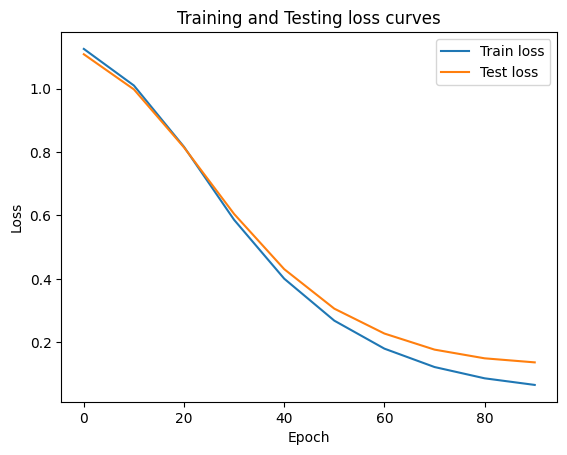

In [24]:
# Plot the loss function
plt.plot(epoch_counts, np.array(torch.tensor(train_losses).numpy()), label="Train loss")
plt.plot(epoch_counts, np.array(torch.tensor(test_losses).numpy()), label="Test loss")
plt.title("Training and Testing loss curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

### Making predictions


In [25]:
# What's the raw output of the untrained model
model.eval()

with torch.inference_mode():
  test_logits = model(X_test)

test_logits[:10]

tensor([[-5.8771,  4.4629,  6.5155],
        [-7.5451,  4.1668,  9.7293],
        [-8.4517,  5.1275, 10.2015],
        [-4.3411,  5.6280,  2.5636],
        [-7.1838,  4.8757,  8.3024],
        [-3.3940,  5.3421,  1.2802],
        [-5.9240,  4.9826,  6.0025],
        [-4.2895,  5.7016,  2.3920],
        [-6.5369,  4.9261,  7.1291],
        [-8.0526,  4.4129, 10.3325]])

In [26]:
# From logits to probabilities
y_test_probs = torch.softmax(test_logits, dim=1)
y_test_probs[:10]

tensor([[3.6770e-06, 1.1378e-01, 8.8621e-01],
        [3.1344e-08, 3.8244e-03, 9.9618e-01],
        [7.8757e-09, 6.2185e-03, 9.9378e-01],
        [4.4737e-05, 9.5535e-01, 4.4601e-02],
        [1.8220e-07, 3.1474e-02, 9.6853e-01],
        [1.5794e-04, 9.8292e-01, 1.6921e-02],
        [4.8601e-06, 2.6504e-01, 7.3495e-01],
        [4.4187e-05, 9.6472e-01, 3.5240e-02],
        [1.0457e-06, 9.9476e-02, 9.0052e-01],
        [1.0334e-08, 2.6790e-03, 9.9732e-01]])

In [27]:
# From probabilities to predictions
y_predictions = torch.argmax(y_test_probs, dim=1)
y_predictions[:10]

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2])

In [28]:
# Compare with y_test label
print(y_predictions == y_test)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True])


In [29]:
# Count how many correct outputs
correct = 0 # (We have y_test=30 in total)

model.eval()
with torch.inference_mode():
  for i, data in enumerate(y_predictions):
    if data == y_test[i]:
      correct += 1

print()
print(f'We got {correct} out of {len(y_test)} correct predictions!')


We got 28 out of 30 correct predictions!


In [30]:
# Count how many correct predictions
correct = 0 # (We have y_test=30 in total)

model.eval()
with torch.inference_mode():
  for i, data in enumerate(X_test):
    logits = model(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    elif y_test[i] == 2:
      x = 'Virginica'

    print(f'{i+1}: {logits}\t {y_test[i]} \t {logits.argmax().item()}')
    # print(f'{i+1}: {logits}\t {x} \t {logits.argmax().item()}')

  # Correct or not the model's predictions
    if logits.argmax().item() == y_test[i]:
      correct += 1
print()
print(f'We got {correct} correct predictions!')

1: tensor([-5.8771,  4.4629,  6.5155])	 2 	 2
2: tensor([-7.5451,  4.1668,  9.7293])	 2 	 2
3: tensor([-8.4517,  5.1275, 10.2015])	 2 	 2
4: tensor([-4.3411,  5.6280,  2.5636])	 1 	 1
5: tensor([-7.1838,  4.8757,  8.3023])	 2 	 2
6: tensor([-3.3940,  5.3421,  1.2802])	 1 	 1
7: tensor([-5.9240,  4.9826,  6.0025])	 2 	 2
8: tensor([-4.2895,  5.7016,  2.3920])	 1 	 1
9: tensor([-6.5369,  4.9261,  7.1291])	 2 	 2
10: tensor([-8.0526,  4.4129, 10.3325])	 2 	 2
11: tensor([-5.6775,  4.9505,  5.6248])	 2 	 2
12: tensor([ 4.5748, -2.2579, -2.8925])	 0 	 0
13: tensor([ 4.2646, -2.0055, -2.7342])	 0 	 0
14: tensor([-2.1081,  4.0482,  0.5803])	 1 	 1
15: tensor([ 3.4608, -1.2147, -2.3488])	 0 	 0
16: tensor([-5.4739,  5.1174,  5.0966])	 2 	 1
17: tensor([ 4.0637, -1.8045, -2.6504])	 0 	 0
18: tensor([-5.8090,  4.6057,  6.2494])	 1 	 2
19: tensor([ 4.9250, -2.5763, -3.0545])	 0 	 0
20: tensor([ 3.4559, -1.2559, -2.3637])	 0 	 0
21: tensor([-2.6161,  4.5584,  0.8575])	 1 	 1
22: tensor([-7.7427,  

### Evaluate NEW Data on the Network

In [31]:
# Create a new flower (data)
# new_iris = torch.tensor([4.7, 1.2, 1.3, 0.2])
new_iris = torch.tensor([6.7, 3.0, 5.2, 2.3])

In [32]:
# The process is similar to a testing process
model.eval()

with torch.inference_mode():
  logits = model(new_iris)

  new_preds = torch.softmax(logits, dim=0).argmax(dim=0)

  if new_preds == 0:
    x = 'Setosa'
  elif new_preds == 1:
    x = 'Versicolor'
  else:
    x = 'Virginica'

print(f"This is class {new_preds.item()} -> {x}")

This is class 2 -> Virginica


### Save and Load our Model

In [33]:
# Save the model
torch.save(model.state_dict(), 'iris_model.pt')

In [34]:
# Load the Saved model
new_model = Model()
new_model.state_dict(torch.load('iris_model.pt'))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1898: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


OrderedDict([('layer_1.weight',
              tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
                      [-0.2350,  0.2720, -0.3718,  0.2452],
                      [ 0.3045,  0.1357,  0.0896,  0.1933],
                      [ 0.3782,  0.0407, -0.3600,  0.4613],
                      [ 0.3666, -0.0116, -0.2923, -0.1937],
                      [-0.4415,  0.3314, -0.0434,  0.3445],
                      [ 0.1883, -0.0992, -0.3197,  0.1740],
                      [-0.3208, -0.1111,  0.2972, -0.2723]])),
             ('layer_1.bias',
              tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626])),
             ('layer_2.weight',
              tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
                      [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
                      [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
                      [ 0.1133, -0.352

In [35]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (layer_1): Linear(in_features=4, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=9, bias=True)
  (layer_3): Linear(in_features=9, out_features=3, bias=True)
  (relu): ReLU()
)